**Data Collection and Preprocessing**

In [1]:
import pandas as pd
import zipfile
import os

**Loading** **Dataset**

In [2]:
zip_ref=zipfile.ZipFile("/content/fraudTrain.csv.zip","r")
with zip_ref.open('fraudTrain.csv') as csv_file:
    df= pd.read_csv(csv_file)

zip_ref.close()
print(df.head())

   Unnamed: 0 trans_date_trans_time            cc_num  ...  merch_lat  merch_long  is_fraud
0           0   2019-01-01 00:00:18  2703186189652095  ...  36.011293  -82.048315         0
1           1   2019-01-01 00:00:44      630423337322  ...  49.159047 -118.186462         0
2           2   2019-01-01 00:00:51    38859492057661  ...  43.150704 -112.154481         0
3           3   2019-01-01 00:01:16  3534093764340240  ...  47.034331 -112.561071         0
4           4   2019-01-01 00:03:06   375534208663984  ...  38.674999  -78.632459         0

[5 rows x 23 columns]


**Dataset** **Information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


**Checking** **Missing** **Values** **&** **Duplicates**

In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [6]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows in train: {duplicate_count}")
if duplicate_count > 0:
    df = df.drop_duplicates()

Number of duplicate rows in train: 0


**Featuring** **Engineering**

In [7]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["dob"] = pd.to_datetime(df["dob"])
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
df["trans_year"] = pd.Series(pd.to_datetime(df.trans_date_trans_time)).dt.year
df["dob"] = pd.Series(pd.to_datetime(df.dob)).dt.year

In [9]:
age = pd.Series(df.trans_year - df.dob)
df["age"] = age
bins = [10, 18, 35, 60, 100]
labels = ["14-18", "18-35", "35-60", "60+"]
df["age_group"] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

In [10]:
state_to_region = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast',
    'MA': 'Northeast', 'RI': 'Northeast', 'CT': 'Northeast',
    'NY': 'Northeast', 'NJ': 'Northeast', 'PA': 'Northeast',
    'OH': 'Midwest', 'IN': 'Midwest', 'IL': 'Midwest', 'MI': 'Midwest',
    'WI': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest',
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest',
    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South',
    'WV': 'South', 'NC': 'South', 'SC': 'South',
    'GA': 'South', 'FL': 'South', 'AL': 'South', 'MS': 'South',
    'TN': 'South', 'KY': 'South', 'AR': 'South', 'LA': 'South',
    'OK': 'South', 'TX': 'South', 'MT': 'Rocky Mountains', 'WY': 'Rocky Mountains',
    'CO': 'Rocky Mountains', 'NM': 'Rocky Mountains', 'ID': 'Rocky Mountains',
    'UT': 'Rocky Mountains', 'WA': 'Far West', 'OR': 'Far West',
    'CA': 'Far West', 'HI': 'Far West', 'AK': 'Far West'
}

df["Region"] = df.state.map(state_to_region)

In [11]:
df["is_weekend"] = df["trans_date_trans_time"].dt.day_name().apply(lambda x : int((x == "Friday") | (x == "Sunday") | (x == "saturday")))

In [12]:
def day_period(x):
    if x >=0 and x < 6: return "Night"
    elif x>= 6 and x <= 12: return "Morning"
    elif x> 12 and x <= 15: return "Afternoon"
    elif x> 15 and x <= 20: return "Evening"
    elif x> 20 and x <= 24: return "Night"


df["day_period"] = df["trans_date_trans_time"].dt.hour.apply(day_period)

In [13]:
df["trans_month"] = df["trans_date_trans_time"].dt.month_name()

In [14]:
sector_bag = {
    "IT": ["engineer", "developer", "programmer", "software", "IT", "technician", "architect", "system", "network",
           "administrator", "data scientist", "cybersecurity", "web developer", "analyst", "database", "devops"],

    "Education": ["teacher", "professor", "educator", "trainer", "lecturer", "scientist", "Orthoptist", "tutor",
                  "principal", "instructor", "counselor", "academic", "researcher", "dean", "school", "headmaster"],

    "Healthcare": ["doctor", "nurse", "medical", "therapist", "pharmacist", "health", "surgeon", "dentist", "clinician",
                   "physician", "optometrist", "radiologist", "paramedic", "midwife", "veterinarian", "psychiatrist"],

    "Finance": ["analyst", "accountant", "auditor", "banker", "financial", "investment", "controller", "broker",
                "consultant", "treasurer", "loan officer", "trader", "actuary", "economist", "portfolio", "credit"],

    "Marketing": ["manager", "executive", "specialist", "consultant", "advertising", "public relations", "strategist",
                  "director", "coordinator", "brand", "SEO", "content", "digital", "market research", "social media",
                  "copywriter"],

    "Manufacturing": ["operator", "mechanic", "assembler", "fabricator", "engineer", "technician", "welder",
                      "planner", "quality", "machinist", "production", "inspector", "supervisor", "foreman",
                      "toolmaker", "CNC"],

    "Retail": ["cashier", "salesperson", "store", "associate", "manager", "clerk", "shopkeeper", "merchandiser",
               "assistant", "retail", "customer service", "sales", "inventory", "buyer", "stocker", "checkout"],

    "Legal": ["lawyer", "attorney", "paralegal", "judge", "legal", "solicitor", "notary", "clerk", "litigator",
              "advocate", "barrister", "counsel", "magistrate", "prosecutor", "defense", "compliance"],

    "Hospitality": ["chef", "waiter", "bartender", "host", "manager", "receptionist", "housekeeper", "concierge",
                    "caterer", "cook", "hotel", "tour guide", "event planner", "sous chef", "sommelier", "valet"],

    "Construction": ["builder", "carpenter", "electrician", "plumber", "architect", "project manager", "site manager",
                     "surveyor", "foreman", "bricklayer", "roofer", "civil engineer", "construction", "contractor",
                     "inspector", "draftsman"]
}

def assign_sector(x):
    if x is not None:
        for key in sector_bag:
            for role in sector_bag[key]:
                if x.find(role) != -1:
                    return key
    return "Other"

df["job_sector"] = df["job"].apply(assign_sector)

In [15]:
num_data = df.select_dtypes(include="number")

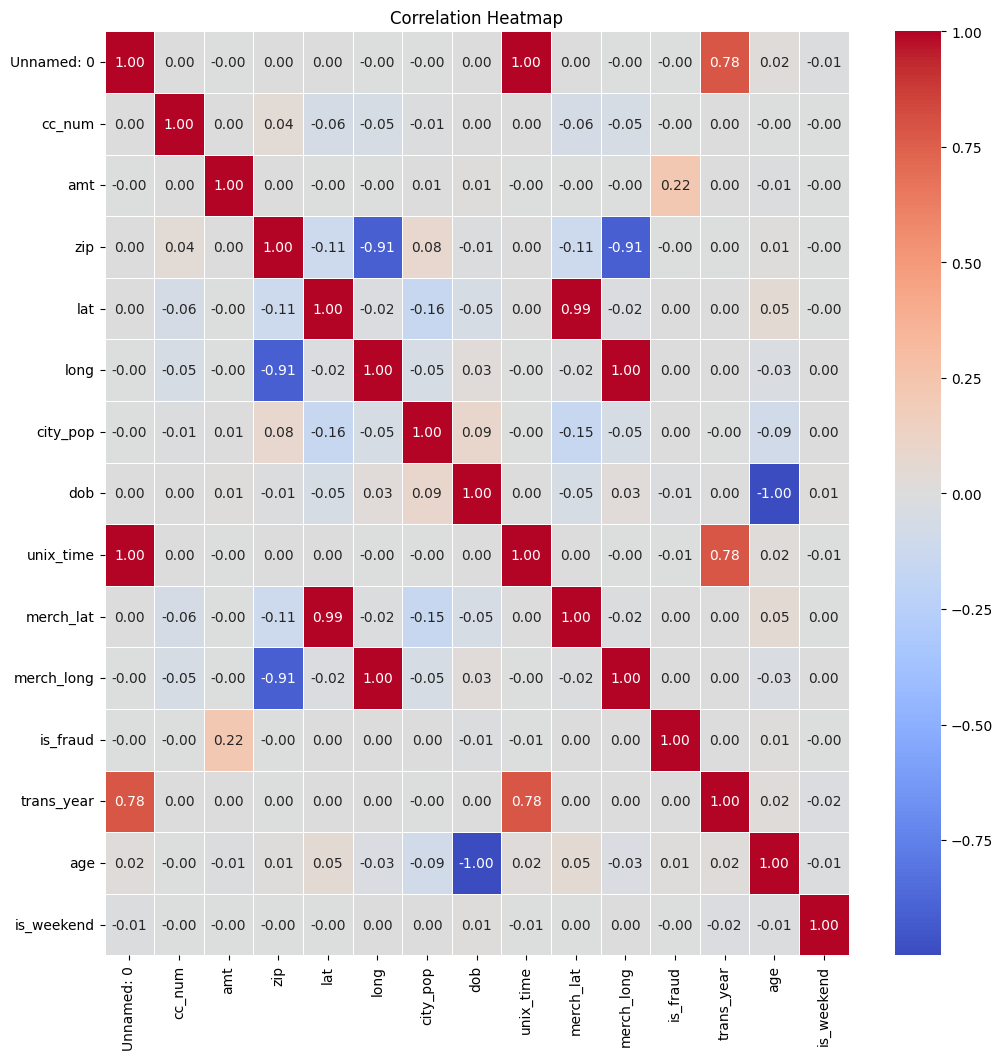

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = num_data.corr()

plt.figure(figsize=(12, 12))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

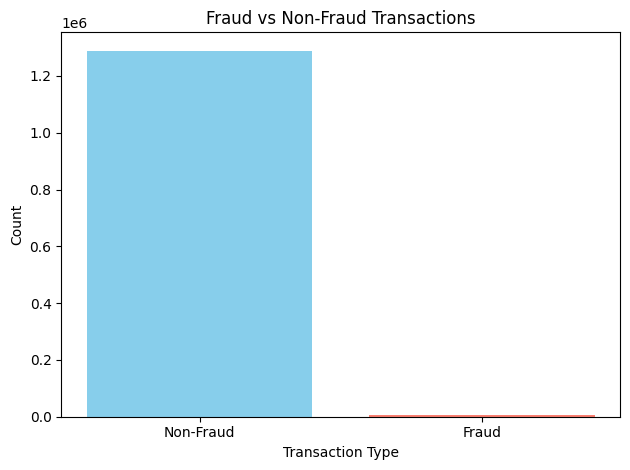

In [17]:
fraud_counts = df['is_fraud'].value_counts()
labels = ['Non-Fraud', 'Fraud']
counts = fraud_counts.sort_index().values

plt.bar(labels, counts, color=['skyblue', 'salmon'])
plt.title('Fraud vs Non-Fraud Transactions')
plt.ylabel('Count')
plt.xlabel('Transaction Type')
plt.tight_layout()
plt.show()

In [18]:
df_cleaned = df.drop(columns=['Unnamed: 0','merchant','job','street', 'lat', 'long', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',"zip","cc_num","first","last","state","city"])

In [19]:
df_cleaned.columns

Index(['trans_date_trans_time', 'category', 'amt', 'gender', 'city_pop', 'dob',
       'is_fraud', 'trans_year', 'age', 'age_group', 'Region', 'is_weekend',
       'day_period', 'trans_month', 'job_sector'],
      dtype='object')

In [20]:
df_cleaned.head()

,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud,trans_year,age,age_group,Region,is_weekend,day_period,trans_month,job_sector
0,2019-01-01 00:00:18,misc_net,4.97,F,3495,1988,0,2019,31,18-35,South,0,Night,January,Legal
1,2019-01-01 00:00:44,grocery_pos,107.23,F,149,1978,0,2019,41,35-60,Far West,0,Night,January,Education
2,2019-01-01 00:00:51,entertainment,220.11,M,4154,1962,0,2019,57,35-60,Rocky Mountains,0,Night,January,Other
3,2019-01-01 00:01:16,gas_transport,45.00,M,1939,1967,0,2019,52,35-60,Rocky Mountains,0,Night,January,Legal
4,2019-01-01 00:03:06,misc_pos,41.96,M,99,1986,0,2019,33,18-35,South,0,Night,January,Healthcare


**Feature** **Encoding**

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_cleaned["category"] = encoder.fit_transform(df_cleaned["category"])
df_cleaned["gender"] = encoder.fit_transform(df_cleaned["gender"])
df_cleaned["Region"] = encoder.fit_transform(df_cleaned["Region"])
df_cleaned["trans_month"] = encoder.fit_transform(df_cleaned["trans_month"])
df_cleaned["day_period"] = encoder.fit_transform(df_cleaned["day_period"])
df_cleaned["trans_year"] = encoder.fit_transform(df_cleaned["trans_year"])
df_cleaned["job_sector"] = encoder.fit_transform(df_cleaned["job_sector"])
df_cleaned["age_group"] = encoder.fit_transform(df_cleaned["age_group"])

In [22]:
df_cleaned.head()

,trans_date_trans_time,category,amt,gender,city_pop,dob,is_fraud,trans_year,age,age_group,Region,is_weekend,day_period,trans_month,job_sector
0,2019-01-01 00:00:18,8,4.97,0,3495,1988,0,0,31,1,4,0,3,4,5
1,2019-01-01 00:00:44,4,107.23,0,149,1978,0,0,41,2,0,0,3,4,1
2,2019-01-01 00:00:51,0,220.11,1,4154,1962,0,0,57,2,3,0,3,4,8
3,2019-01-01 00:01:16,2,45.00,1,1939,1967,0,0,52,2,3,0,3,4,5
4,2019-01-01 00:03:06,9,41.96,1,99,1986,0,0,33,1,4,0,3,4,3


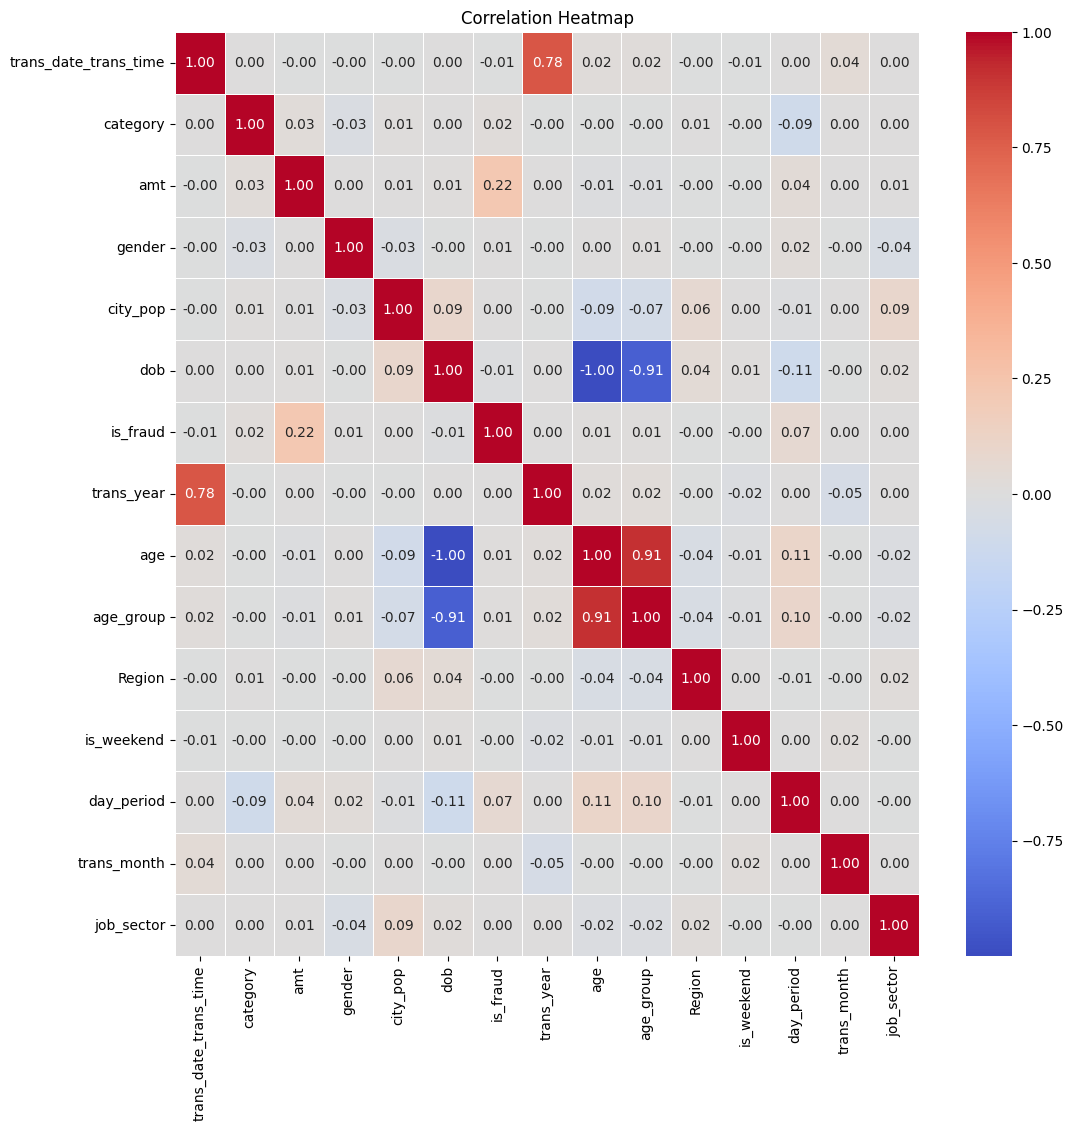

In [23]:
corr_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 12))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

**Handeling** **imbalanced** **data**

In [24]:
df=df_cleaned
fraud_df = df[df['is_fraud'] == 1]
no_fraud_df = df[df['is_fraud'] == 0]

fraud_subset = fraud_df.sample(n=7000, random_state=42,replace = False)
no_fraud_subset = no_fraud_df.sample(n=10000, random_state=42, replace = False)

new_df = pd.concat([fraud_subset, no_fraud_subset])

new_df.reset_index(drop=True, inplace=True)

df = new_df

In [25]:
df.to_csv('cleaned_fraud_data.csv', index=False)

**Data** **Splitting**

In [26]:
X = df.drop('is_fraud', axis=1)
Y = df['is_fraud']

In [27]:
Y.value_counts()

,count
is_fraud,
0,10000
1,7000


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Feature** **Scaling**

In [29]:
from sklearn.preprocessing import StandardScaler
X_train = X_train.drop('trans_date_trans_time', axis=1)
X_test = X_test.drop('trans_date_trans_time', axis=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)